In [1]:
import pandas as pd

In [2]:
# Import data
re_df = pd.read_csv("./data/real_estate_encoded.csv")
refnis_df = pd.read_excel("./data/postal_refnis_conv.xlsx")
income_df = pd.read_excel("./data/taxable_income.xlsx")

### Sources:
- Postal code and refnis conversion: https://statbel.fgov.be/nl/over-statbel/methodologie/classificaties/geografie
- Taxable income per region: https://statbel.fgov.be/en/themes/households/taxable-income#figures

In [3]:
re_df.head()

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,...,furnished,open_fire,terrace,garden,plot_surface,terrace_encoded,equipped_kitchen_encoded,building_condition_encoded,subtype_of_property_encoded,commune_encoded
0,2600,Berchem,Antwerpen,0,apartment,149000.0,good,2.0,48,installed,...,0,0,9,0,0,1,2,3,0,34.0
1,2100,Deurne,Antwerpen,0,apartment,248000.0,good,2.0,91,installed,...,0,0,2,0,0,1,2,3,0,75.0
2,2660,Hoboken,Antwerpen,0,apartment,229000.0,as new,2.0,100,not installed,...,0,0,26,0,0,1,0,5,0,141.0
3,1180,Uccle,Bruxelles,0,apartment,470000.0,good,2.0,179,hyper equipped,...,0,0,10,0,0,1,3,3,0,514.0
4,2018,Antwerpen,Antwerpen,0,apartment,480000.0,just renovated,2.0,116,installed,...,0,0,7,0,0,1,2,4,0,12.0


In [4]:
income_df.head()

,Administrative Unit,NIS code,Total net taxable income,Average values,Prosperity index,State tax,Municipal and agglomeration tax,Total tax
0,Province of Antwerp,10000,43463433801,39117,104,9722252776,693745919,10415998694
1,Province of East Flanders,40000,36891868109,39945,109,8496779008,604765506,9101544514
2,Province of Flemish Brabant,20001,29808966587,44465,115,7399882917,525793584,7925676501
3,Province of West Flanders,30000,27811507618,37809,105,5880415006,396628007,6277043013
4,Province of Hainaut,50000,25846612361,32560,87,4900705546,415015633,5315721178


In [5]:
refnis_df.head()

,Postal code,Refnis code,Gemeentenaam,Nom commune
0,1000,21004,Brussel,Bruxelles
1,1020,21004,Brussel,Bruxelles
2,1030,21015,Schaarbeek,Schaerbeek
3,1040,21004,Brussel,Bruxelles
4,1040,21005,Etterbeek,Etterbeek


In [ ]:
# Merge columns from refnis_df in re_df based on postal code
re_df = pd.merge(re_df, refnis_df[['Postal code', 'Refnis code']], left_on='zip_code', right_on='Postal code', how='left')
    # how='left' ensures that all rows from re_df are kept and the corresponding values from refnis_df is added

# Drop the extra 'Postal code' column
re_df = re_df.drop(columns=['Postal code'])

In [13]:
re_df.columns

Index(['zip_code', 'commune', 'province', 'type_of_property',
       'subtype_of_property', 'price', 'building_condition', 'facade_number',
       'living_area', 'equipped_kitchen', 'bedroom_nr', 'swimming_pool',
       'furnished', 'open_fire', 'terrace', 'garden', 'plot_surface',
       'terrace_encoded', 'equipped_kitchen_encoded',
       'building_condition_encoded', 'subtype_of_property_encoded',
       'commune_encoded', 'Refnis code'],
      dtype='object')

In [12]:
income_df.columns

Index(['Administrative Unit', 'NIS code', 'Total net taxable income',
       'Average values', 'Prosperity index', 'State tax',
       'Municipal and agglomeration tax', 'Total tax'],
      dtype='object')

In [ ]:
# Merge columns from income_df in re_df based on refnis code
re_df = pd.merge(re_df, income_df[['NIS code', 'Total net taxable income', 'Average values', 'Prosperity index']], left_on='Refnis code', right_on='NIS code', how='left') # keep left

# Rename the imported columns
re_df = re_df.rename(columns={'Total net taxable income': 'com_tot_income', 'Average values': 'com_avg_income', 'Prosperity index': 'com_prosp_index'})

# Drop 'NIS code'
re_df = re_df.drop(columns=['NIS code'])

In [20]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17763 entries, 0 to 17762
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip_code                     17763 non-null  int64  
 1   commune                      17763 non-null  object 
 2   province                     17763 non-null  object 
 3   type_of_property             17763 non-null  int64  
 4   subtype_of_property          17763 non-null  object 
 5   price                        17763 non-null  float64
 6   building_condition           17763 non-null  object 
 7   facade_number                17763 non-null  float64
 8   living_area                  17763 non-null  int64  
 9   equipped_kitchen             17763 non-null  object 
 10  bedroom_nr                   17763 non-null  int64  
 11  swimming_pool                17763 non-null  int64  
 12  furnished                    17763 non-null  int64  
 13  open_fire       

# Achtung: 'Garden' has only 0 values!

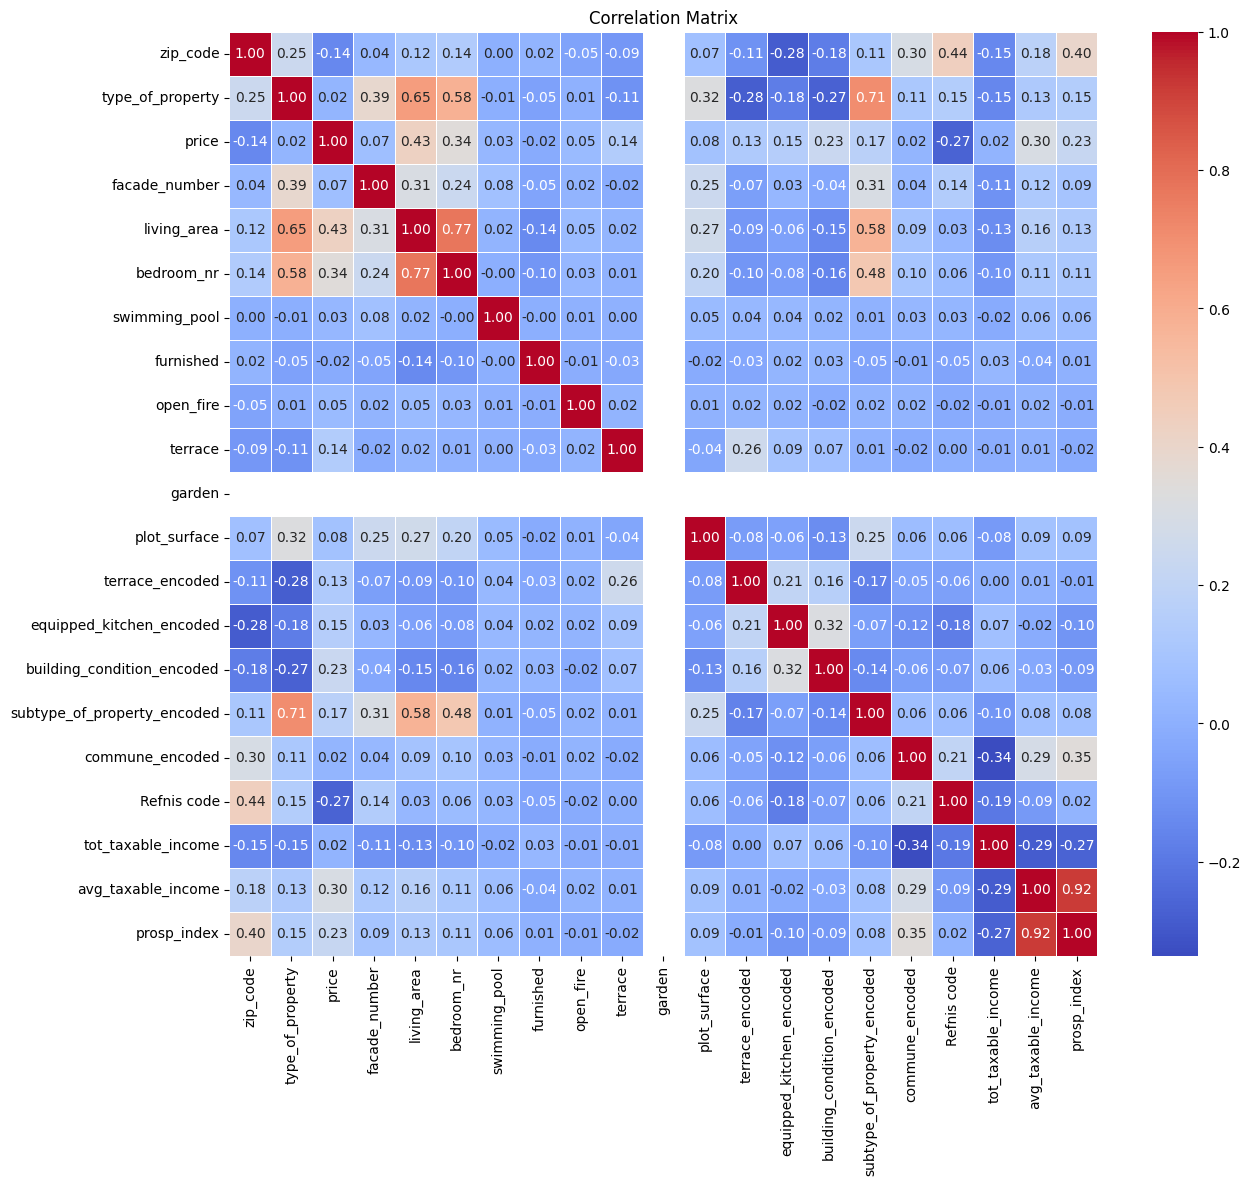

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numer
numerical_cols = re_df.select_dtypes(include=['number']).columns  # Select only numerical columns
correlation_matrix = re_df[numerical_cols].corr()  # Compute the correlation matrix

# Plot the correlation matrix using seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
